We suspect that our labeled dataset is biased. In this notebook, I made some first plots to see whether this is indeed the case.

#### Load libraries and data

In [2]:
import seaborn as sb
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [4]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/All_Data_Prepped.csv"

df= read_file(url)

## Visualisation

Emiel gave an indication of which features probably cause the most bias. The features he mentioned were 'log Kow (KowWin v1.67)' (QSAR prediction of the 10log of the octanol/water partition coefficient) and 'BIOWIN3' (QSAR prediction of rate of environmental mineralization ). Emiel suspects that Moleculair Weight (MW) is not a cause of bias (i.e., the distribution of molecular weight only in the labeled dataset should be representative of the population/testing set).

### Scatterplot comparisons

The orange points are from the labeled dataset(about 750 entries), the green points are from the unlabeled physchem dataset (about 64000 entries).
The normalized versions of the density plots on the diagonal can be found further down in this notebook

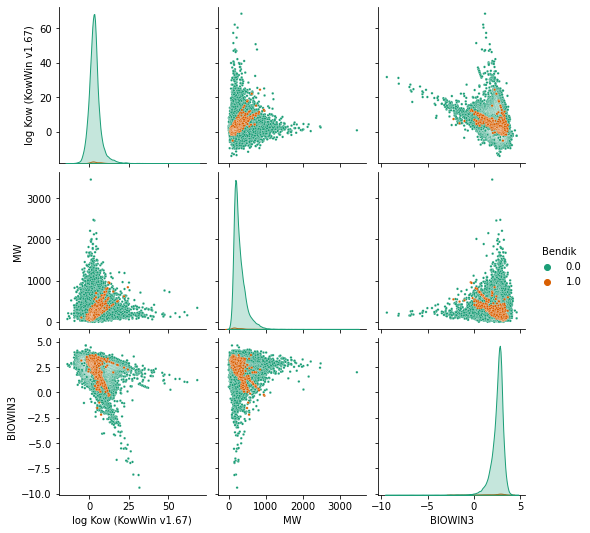

In [5]:
sb.pairplot(df, vars=['log Kow (KowWin v1.67)','MW','BIOWIN3',], hue='Bendik', palette='Dark2', plot_kws={"s": 6})

### Scatterplot comparisons up close

#### log Kow vs Molecular Weight

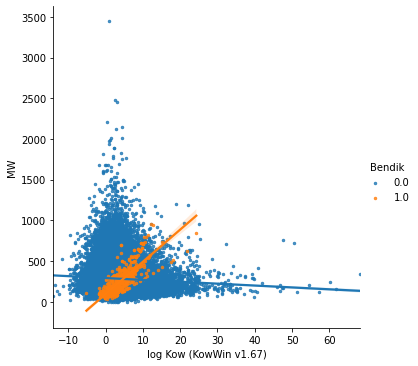

In [6]:
sb.lmplot(x='log Kow (KowWin v1.67)', y='MW', hue = 'Bendik',scatter_kws={"s": 6}, data=df)

#### Density

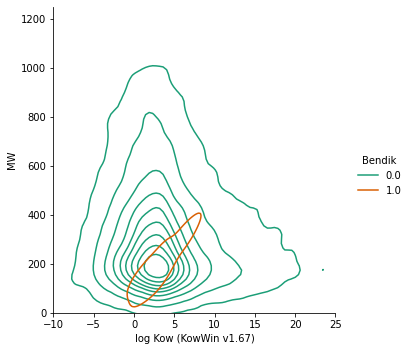

In [31]:
sb.displot(df, x='log Kow (KowWin v1.67)', y='MW', hue = 'Bendik', kind="kde", palette='Dark2').set(xlim=(-10, 25), ylim=(0,1250))

#### log Kow vs BIOWIN 3

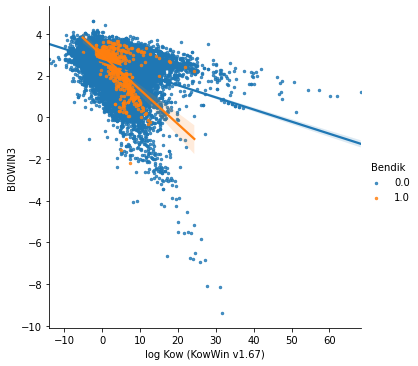

In [7]:
sb.lmplot(x='log Kow (KowWin v1.67)', y='BIOWIN3', hue = 'Bendik',scatter_kws={"s": 6}, data=df)

#### Density

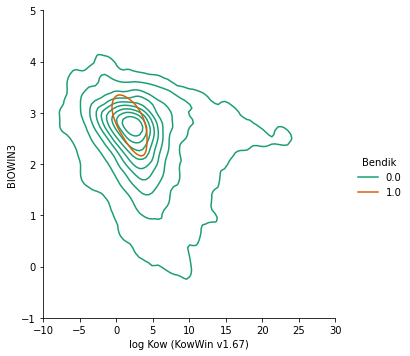

In [34]:
sb.displot(df, x='log Kow (KowWin v1.67)', y='BIOWIN3', hue = 'Bendik', kind="kde", palette='Dark2').set(xlim=(-10, 30), ylim=(-1,5))

#### BIOWIN 3 vs Molecular Weight

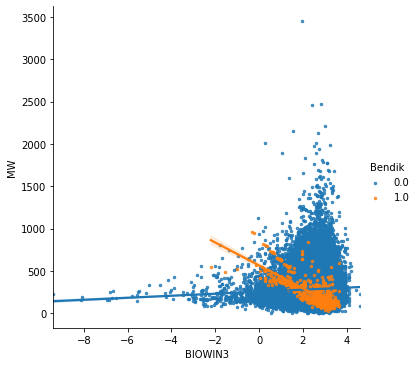

In [8]:
sb.lmplot(x='BIOWIN3', y='MW', hue = 'Bendik',scatter_kws={"s": 6}, data=df)

#### Density

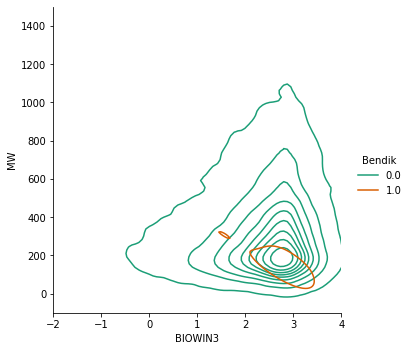

In [33]:
sb.displot(df, x='BIOWIN3', y='MW', hue = 'Bendik', kind="kde", palette='Dark2').set(xlim=(-2, 4), ylim=(-100,1500))

### Normalized histogram/kde comparisons

#### Molecular weight kernel density estimation

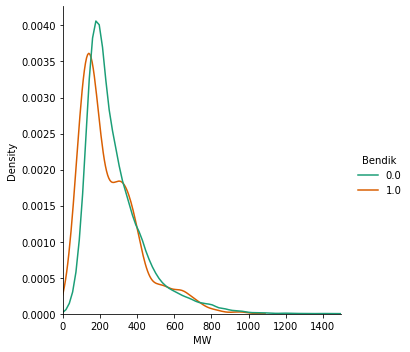

In [14]:
sb.displot(df, x="MW", kind = "kde", hue='Bendik', common_norm=False, palette='Dark2').set(xlim=(0, 1500))

#### Molecular weight histogram

[(0.0, 1000.0)]

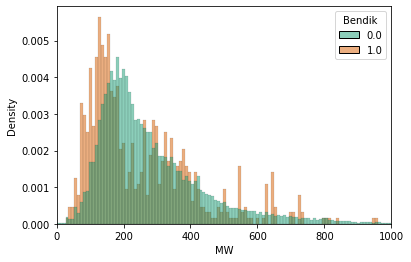

In [19]:
sb.histplot(df, x="MW", hue = 'Bendik', stat='density', common_norm =False, palette='Dark2').set(xlim=(0, 1000))

#### log Kow kernel density estimation

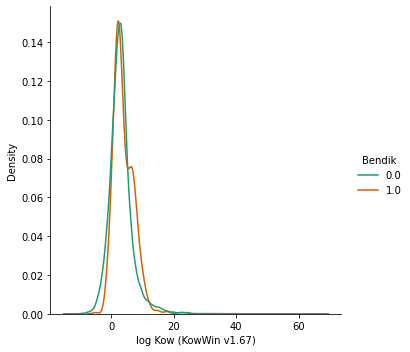

In [10]:
sb.displot(df, x="log Kow (KowWin v1.67)", kind = "kde", hue='Bendik', common_norm=False, palette='Dark2')

#### log Kow histogram

[(-5.0, 15.0)]

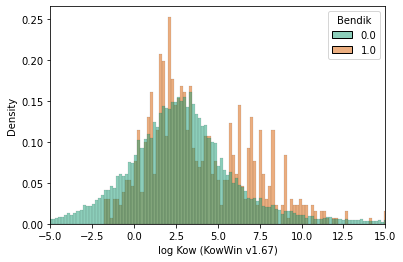

In [22]:
sb.histplot(df, x="log Kow (KowWin v1.67)", hue = 'Bendik', stat='density', common_norm =False, palette='Dark2').set(xlim=(-5, 15))

#### BIOWIN 3 kernel density estimation

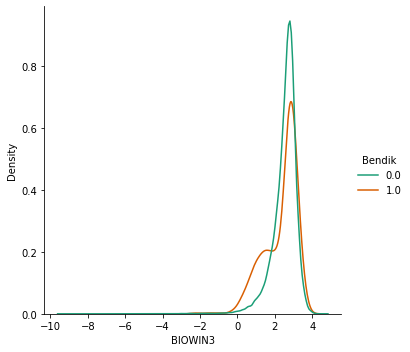

In [11]:
sb.displot(df, x="BIOWIN3", kind = "kde", hue='Bendik', common_norm=False, palette='Dark2')

#### BIOWIN 3 histogram

[(-1.0, 4.0)]

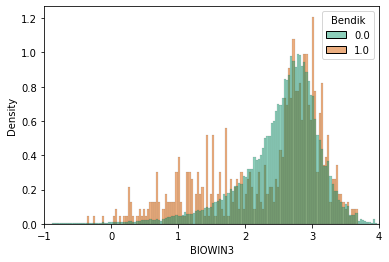

In [25]:
sb.histplot(df, x="BIOWIN3", hue = 'Bendik', stat='density', common_norm =False, palette='Dark2').set(xlim=(-1,4))